# 수업에서 생성된 질문으로 만드는 워드 클라우딩

**참고 : https://pinkwink.kr/1029**
<br>
**https://amueller.github.io/word_cloud/auto_examples/single_word.html**

**구글 드라이드 연결하기**

**1. 필요한 라이브러리 불러오기**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
print(os.getcwd())

/content


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

**2. 텍스트 파일 불러오기**

In [0]:
text = open('/content/drive/My Drive/Colab Notebooks/Exercise/constitution.txt').read()

**3. 워드 클라우드 생성하고 내용 보기**

In [0]:
wordcloud = WordCloud().generate(text)

In [0]:
wordcloud.words_

**4. 그림 그리기**

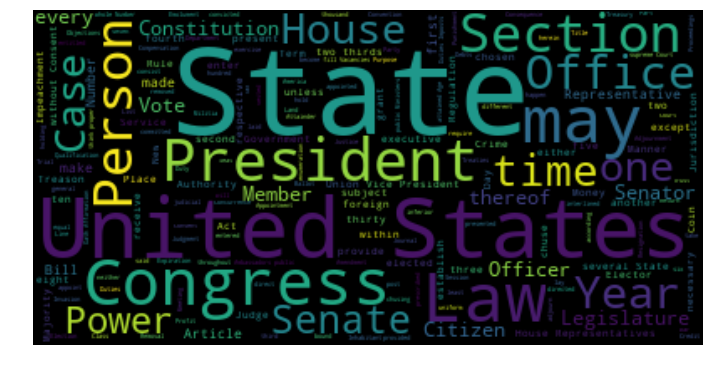

In [0]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**5. 글자 크기를 조절하기**

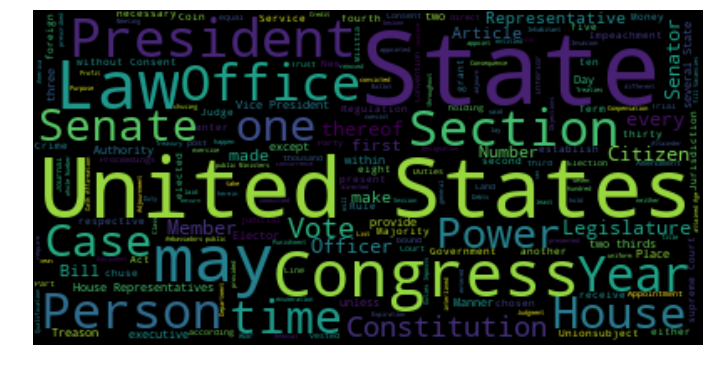

In [0]:
wordcloud = WordCloud(max_font_size=60).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**6. 마스킹 기능을 이용해서 꾸미기**



*   라이브러리 불러오기
*   마스킹 이미지 처리를 위한 배열 처리를 위해 Numpy
<br>
    이미지 처리를 위한 PIL라이브러리를 추가로 불러옴




In [0]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud


In [0]:
text = open('/content/drive/My Drive/Colab Notebooks/Exercise/alice.txt').read()

In [0]:
alice_mask = np.array(Image.open('/content/drive/My Drive/Colab Notebooks/Exercise/masked_002.png'))

In [0]:
stopwords = set(STOPWORDS)
stopwords.add("said")

In [0]:
alice_mask

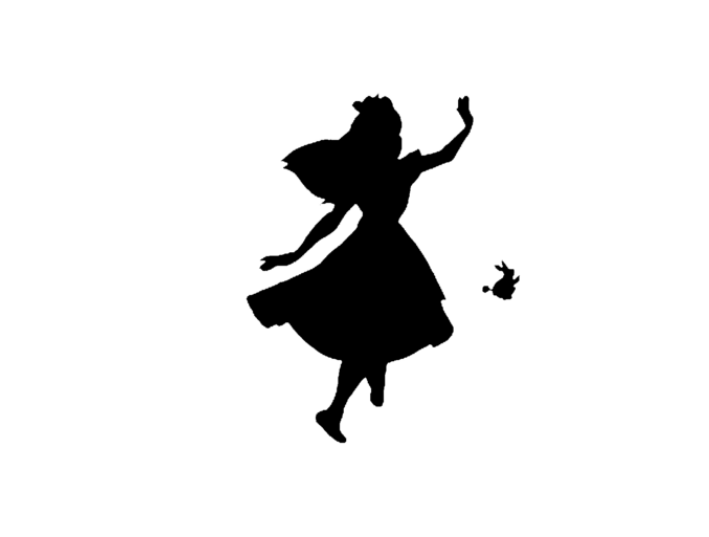

In [0]:
plt.figure(figsize=(12, 12))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
              stopwords=stopwords, contour_width=1, contour_color='steelblue')

wc = wc.generate(text)

In [0]:
wc.words_

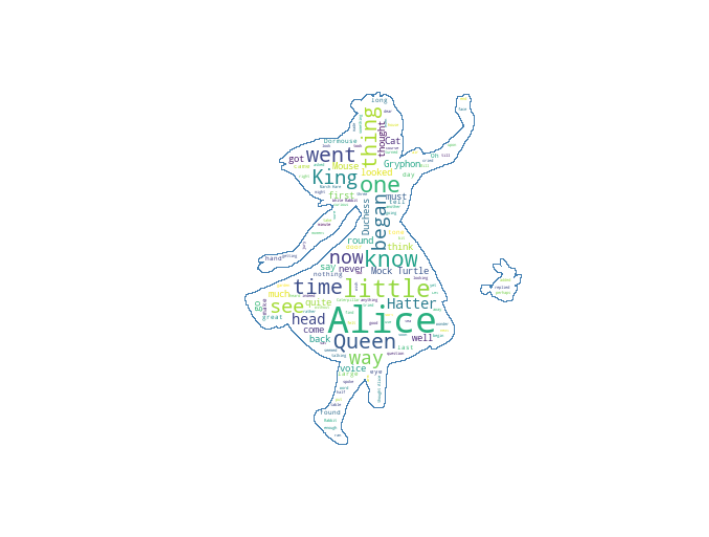

In [0]:
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**7. 색깔 변경해서 그레이톤으로 표현하기**

In [0]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
  
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
              stopwords=stopwords)

wc = wc.generate(text)

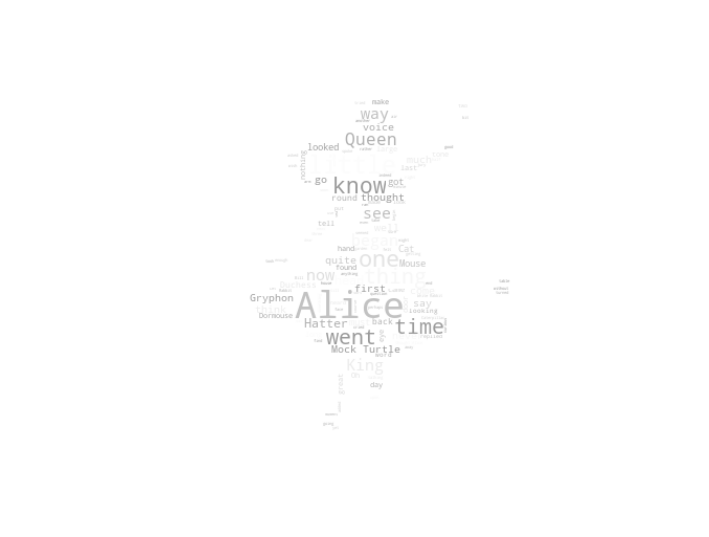

In [0]:
plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.show()


**8. 컬러 이미지를 사용하는 경우**

In [0]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud


In [0]:
text = open('/content/drive/My Drive/Colab Notebooks/Exercise/alice.txt').read()

alice_coloring = np.array(Image.open('/content/drive/My Drive/Colab Notebooks/Exercise/Alice.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [0]:
wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
              stopwords=stopwords, max_font_size=40, random_state=42)

wc = wc.generate(text)

In [0]:
from wordcloud import ImageColorGenerator
image_colors=ImageColorGenerator(alice_coloring)

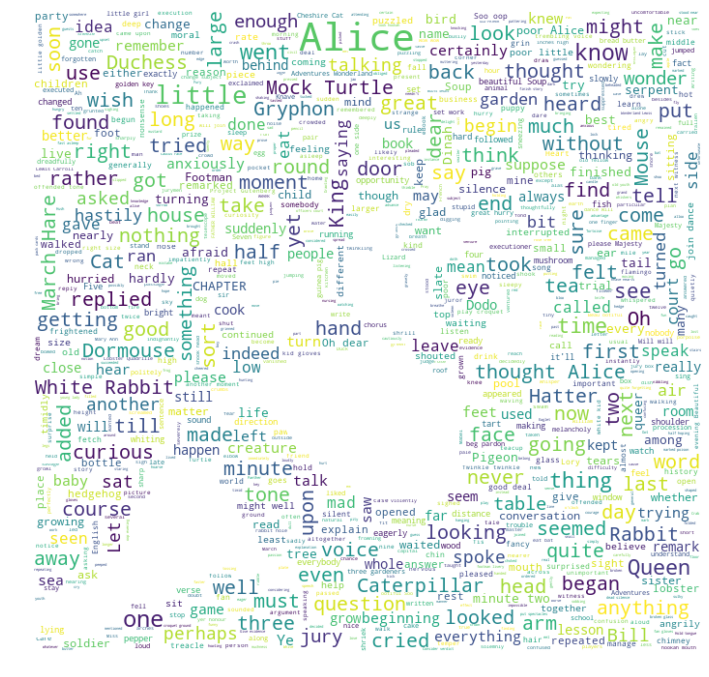

In [0]:
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()